# Heart Disease Prediction

## Introduction

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

## Data Collection

The data set i am using to bild and train the model is taken from the Kaggle

## Data Defination

HeartDisease : Respondents that have ever reported having coronary                    heart disease (CHD) or myocardial infarction (MI).

BMI : Body Mass Index (BMI).

Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).

AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

Stroke : (Ever told) (you had) a stroke?

PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).

MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).

DiffWalking : Do you have serious difficulty walking or climbing stairs?

Sex : Are you male or female?

AgeCategory: Fourteen-level age category.

Race : Imputed race/ethnicity value.

Diabetic : (Ever told) (you had) diabetes?

PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.

GenHealth : Would you say that in general your health is...

SleepTime : On average, how many hours of sleep do you get in a 24-hour period?

Asthma : (Ever told) (you had) asthma?

KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

SkinCancer : (Ever told) (you had) skin cancer? 2 | Importing libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [35]:
df=pd.read_csv("C:/Users/LENOVO/Downloads/heart_2020_cleaned.csv/heart_2020_cleaned.csv")

In [36]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [38]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [39]:
df.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [40]:
print('Null values detected in entire data set: \n')
df.isnull().sum()

Null values detected in entire data set: 



HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [41]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [42]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

In [43]:
print ("Unique values detected in entire data set: \n")
df.nunique()

Unique values detected in entire data set: 



HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [44]:
categorical=df[[var for var in df.columns if df[var].dtype=='O']]
categorical.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [45]:
num=df[[var for var in df.columns if df[var].dtype!="O"]]

In [46]:
num.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [47]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<Axes: xlabel='HeartDisease', ylabel='count'>

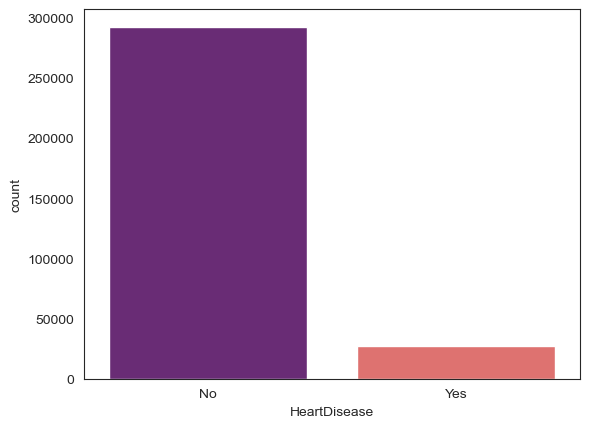

In [48]:
sns.countplot(x='HeartDisease',data=df,palette='magma')

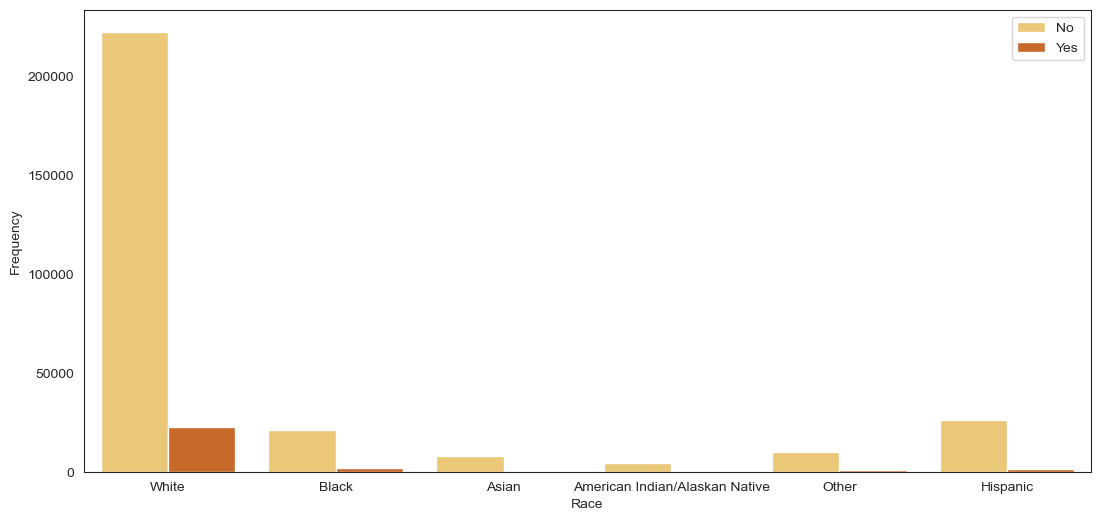

In [49]:
plt.figure(figsize = (13,6))
sns.countplot( x= df['Race'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
plt.xlabel('Race')
plt.legend()
plt.ylabel('Frequency')
plt.show()

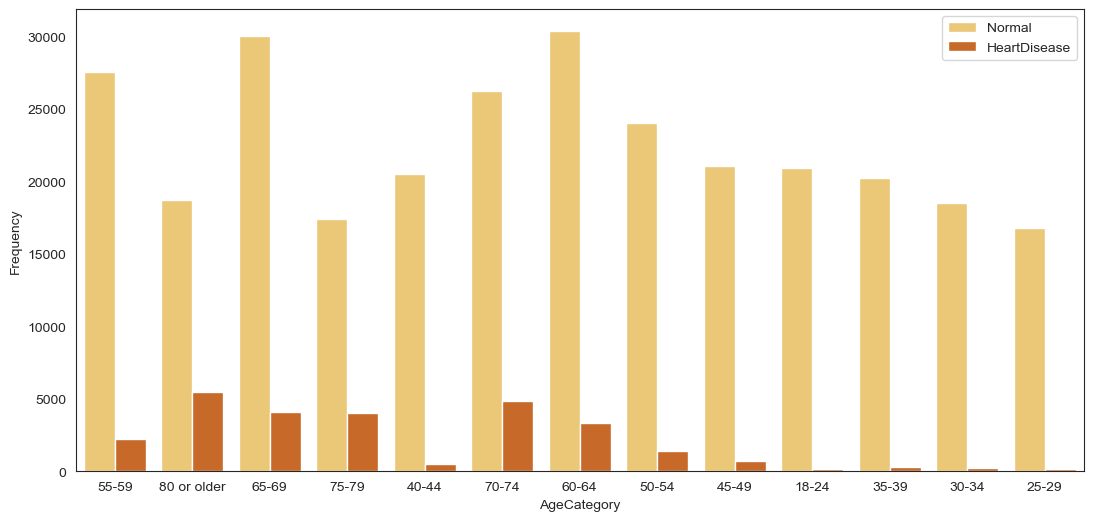

In [50]:
plt.figure(figsize = (13,6))
sns.countplot(x = df['AgeCategory'], hue = 'HeartDisease', data = df, palette = 'YlOrBr')
#fig.suptitle("Distribution of Cases with Yes/No hartdisease according to AgeCategory")
plt.xlabel('AgeCategory')
plt.legend(['Normal','HeartDisease'])
plt.ylabel('Frequency')
plt.show()

In [51]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<Axes: >

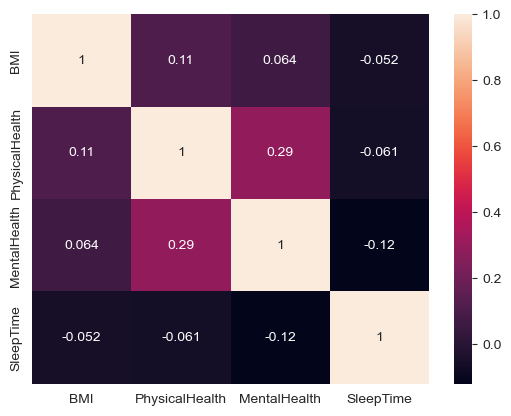

In [52]:
corr=df.corr()
sns.heatmap(corr,annot=True,cbar=True)

### Build and evaluate Machine Learning model

We implement various classifier models and then attempt to tune them to achieve high accuracy when identifying the patient's conditions.

In [53]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df1=categorical.apply(Encoder.fit_transform)

In [54]:
df1.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,0,7,5,2,1,4,1,0,1
1,0,0,0,1,0,0,12,5,0,1,4,0,0,0
2,0,1,0,0,0,1,9,5,2,1,1,1,0,0
3,0,0,0,0,0,0,11,5,0,0,2,0,0,1
4,0,0,0,0,1,0,4,5,0,1,4,0,0,0


In [55]:
df2=pd.concat([num,df1],axis=1)

In [56]:
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,7,5,2,1,4,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,12,5,0,1,4,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,9,5,2,1,1,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,11,5,0,0,2,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,4,5,0,1,4,0,0,0


In [57]:
df.shape

(319795, 18)

In [58]:
df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Split Dataset for Training and Testing

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
#Dropping class label from features X
x=df2.drop(columns='HeartDisease',axis=1)

#Target Class lebel assigned to Y
y=df2['HeartDisease']

# 70/30 split of train/test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

## Data Preprocessing

In [61]:
from sklearn import preprocessing

In [62]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek(random_state=44)
x_train,y_train=smt.fit_resample(x_train,y_train)

In [63]:
y_train.value_counts()

0    203411
1    203411
Name: HeartDisease, dtype: int64

In [64]:
from sklearn.preprocessing import RobustScaler

In [65]:
rs=RobustScaler()
x_train_scl=rs.fit_transform(x_train)
x_test_scl=rs.transform(x_test)

In [66]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_curve

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logreg=LogisticRegression()
logreg.fit(x_train_scl,y_train)

LogisticRegression()

In [69]:
y_pred=logreg.predict(x_test_scl)

In [70]:
y_pred1=logreg.predict(x_train_scl)
print(metrics.classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73    203411
           1       0.72      0.77      0.75    203411

    accuracy                           0.74    406822
   macro avg       0.74      0.74      0.74    406822
weighted avg       0.74      0.74      0.74    406822



In [71]:
def draw_cm(actual,predicted):
  cm=metrics.confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=['No','Yes'],yticklabels=['No','Yes'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

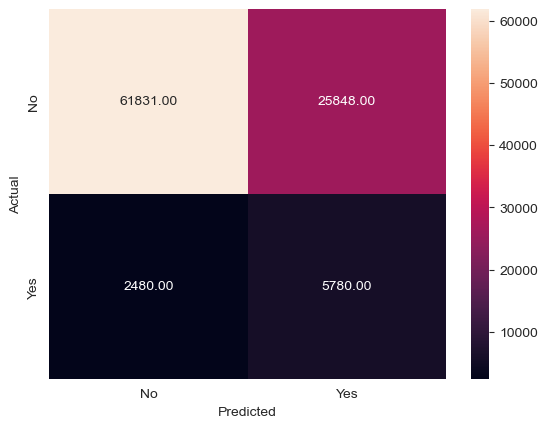

In [72]:
draw_cm(y_test,y_pred)

In [73]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     87679
           1       0.18      0.70      0.29      8260

    accuracy                           0.70     95939
   macro avg       0.57      0.70      0.55     95939
weighted avg       0.89      0.70      0.77     95939



In [74]:
def ROC_Curve(Actual,Predicted):
  fpr,tpr,thresholds = roc_curve(Actual,Predicted)
  roc = plt.plot(fpr,tpr)
  plt.xlabel('False Possitive Rate')
  plt.ylabel('True Possitive Rate')
  plt.title('ROC Curve')
  plt.show()
  Threshold=thresholds
  return roc,thresholds

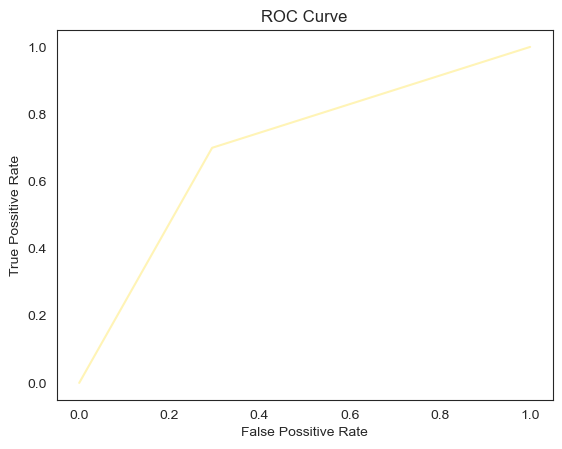

([<matplotlib.lines.Line2D at 0x242132ef890>], array([2, 1, 0]))

In [75]:
ROC_Curve(y_test,y_pred)

In [76]:
metrics.roc_auc_score(y_test,y_pred)

0.7024776184600514

In [77]:
cols = ['Model', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']
result_tabulation = pd.DataFrame(columns = cols)

In [78]:
Log_reg=pd.Series({'Model':'Logistic Regression','Precision Score':metrics.precision_score(y_test,y_pred,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred),'f1-score':metrics.f1_score(y_test,y_pred,average='weighted')})

In [79]:
result_tabulation = result_tabulation.append(Log_reg, ignore_index = True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.894395,0.704729,0.704729,0.768521


## Decission Tree Classifier

In [80]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [81]:
dtc=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1,max_depth=6)
dtc.fit(x_train_scl,y_train)

DecisionTreeClassifier(max_depth=6)

In [82]:
y_pred_dtc=dtc.predict(x_test_scl)

In [83]:
print(metrics.classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.96      0.74      0.83     87679
           1       0.20      0.69      0.31      8260

    accuracy                           0.73     95939
   macro avg       0.58      0.71      0.57     95939
weighted avg       0.90      0.73      0.79     95939



In [84]:
y_pred_dtc1=dtc.predict(x_train_scl)
print(metrics.classification_report(y_train,y_pred_dtc1))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75    203411
           1       0.74      0.76      0.75    203411

    accuracy                           0.75    406822
   macro avg       0.75      0.75      0.75    406822
weighted avg       0.75      0.75      0.75    406822



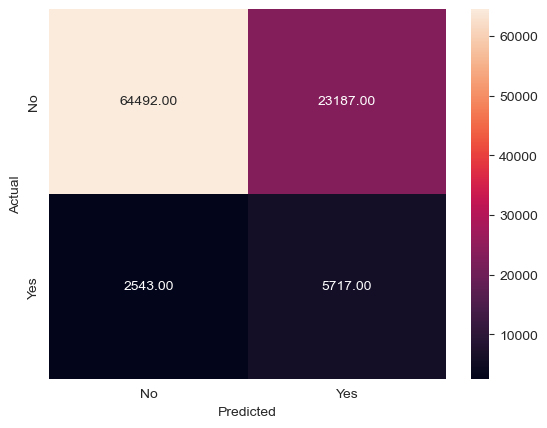

In [85]:
draw_cm(y_test,y_pred_dtc)

In [86]:
Decision_Tree = pd.Series({'Model': "Decision Tree",'Precision Score':metrics.precision_score(y_test,y_pred_dtc,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_dtc,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_dtc),'f1-score':metrics.f1_score(y_test,y_pred_dtc,average='weighted')})


In [87]:
result_tabulation=result_tabulation.append(Decision_Tree,ignore_index=True)
result_tabulation

,Model,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.894395,0.704729,0.704729,0.768521
1,Decision Tree,0.896264,0.731809,0.731809,0.788404


In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
tunning_pt=[{'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_leaf':range(1,30)}]

In [90]:
gs_dt=GridSearchCV(DecisionTreeClassifier(),tunning_pt,scoring='accuracy',cv=10)

In [ ]:
gs_dt.fit(x_train_scl,y_train)

In [ ]:
gs_dt.best_params_

In [ ]:
gs_dt.best_score_

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(max_depth=9,n_estimators=17,max_features=1)


In [ ]:
from time import time

In [ ]:
start = time()
rfc.fit(X_train,y_train)
print("RandomForestClassifier took %.2f seconds"
      % (time() - start,))

y_pred1 = rfc.predict(X_test)

In [ ]:
rfc.fit(x_train_scl,y_train)

In [ ]:
y_pred_rfc=rfc.predict(x_test_scl)

In [ ]:
draw_cm(y_test,y_pred_rfc)

In [ ]:
ROC_Curve(y_test,y_pred1)

In [ ]:
metrics.roc_auc_score(y_test,y_pred1)

In [ ]:
print(metrics.classification_report(y_test,y_pred_rfc))

In [ ]:
Random_Forest = pd.Series({'Model': "Random_Forest",'Precision Score':metrics.precision_score(y_test,y_pred_rfc,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_rfc,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_rfc),'f1-score':metrics.f1_score(y_test,y_pred_rfc,average='weighted')})

In [ ]:
result_tabulation=result_tabulation.append(Random_Forest,ignore_index=True)
result_tabulation

In [ ]:
pt=[{'max_depth':range(1,15),'n_estimators': range(1,20),'max_features':range(1,5)}]

In [ ]:
rfgs=RandomForestClassifier()

In [ ]:
clf=GridSearchCV(rfgs,pt,cv=10,scoring='accuracy')

In [ ]:
clf.fit(x_train_scl,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier(learning_rate=0.1)

In [ ]:
gb.fit(x_train_scl,y_train)

In [ ]:
y_pred_gb=gb.predict(x_test_scl)

In [ ]:
draw_cm(y_test,y_pred_gb)

In [ ]:
print(metrics.classification_report(y_test,y_pred_gb))

In [ ]:
Gradient_boost = pd.Series({'Model': "Gradient_Boost",'Precision Score':metrics.precision_score(y_test,y_pred_gb,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_gb,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_gb),'f1-score':metrics.f1_score(y_test,y_pred_gb,average='weighted')})

In [ ]:
result_tabulation = result_tabulation.append(Gradient_boost, ignore_index = True)
result_tabulation

## Extreme Gradient Boosting 

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier(learning_rate=0.2,max_depth=3,n_estimators=100,subsample=0.5)

In [ ]:
xgb.fit(x_train_scl,y_train)

In [ ]:
y_pred_xgb=xgb.predict(x_test_scl)

In [ ]:
print(metrics.classification_report(y_test,y_pred_xgb))

In [ ]:
draw_cm(y_test,y_pred_xgb)

In [ ]:
XG_boost = pd.Series({'Model': "XG_Boost",'Precision Score':metrics.precision_score(y_test,y_pred_xgb,average='weighted'),'Recall Score':metrics.recall_score(y_test,y_pred_xgb,average='weighted'),
                  'Accuracy Score':metrics.accuracy_score(y_test,y_pred_xgb),'f1-score':metrics.f1_score(y_test,y_pred_xgb,average='weighted')})

In [ ]:
result_tabulation=result_tabulation.append(XG_boost,ignore_index=True)
result_tabulation

In [ ]:
param_grid = [{
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5,0.8, 1.0],
}]

In [ ]:
scoring = 'accuracy'
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scoring, cv=5)
grid_search.fit(x_train_scl, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
result_tabulation=result_tabulation.append(XG_boost,ignore_index=True)
result_tabulation